In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


<strong>Importing the dependencies<strong>

In [2]:
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<strong>Reading the Data</strong>

In [3]:

df=pd.read_csv("/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv")
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df_info=pd.read_csv("/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv")
df_info

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


<strong>Basic EDA</strong>

In [5]:
df.shape

(180519, 53)

In [6]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

<AxesSubplot:>

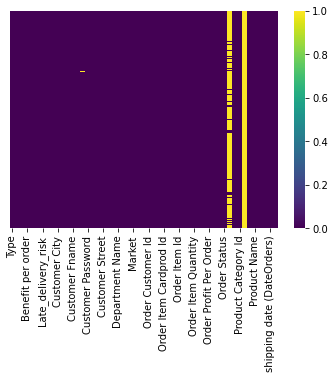

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [9]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


<strong>Data Cleaning<strong>

In [10]:
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)
df.drop('Customer Lname',axis=1,inplace=True)
df.drop('Product Description',axis=1,inplace=True)
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0)
df.drop('Order Zipcode',axis=1,inplace=True)

<AxesSubplot:>

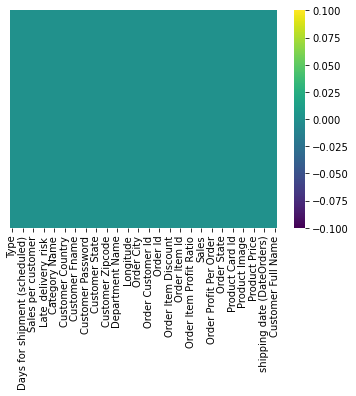

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<strong>Advanced EDA</strong>

<strong>List all the cities and the respective number of pending orders in India.</strong>

In [12]:
data=df[(df['Order Country']=='India') & (df['Order Status']=='PENDING')]
print("Number of Cities in India where order status in pending",data[['Order City','Order Country','Order Status']].shape[0])
print("The cities in India where order status is Pending")
data1=data[['Order City','Order Country','Order Status']]
data1.head()


Number of Cities in India where order status in pending 537
The cities in India where order status is Pending


,Order City,Order Country,Order Status
1,Bikaner,India,PENDING
21,Jabalpur,India,PENDING
45,Bangalore,India,PENDING
46,Bangalore,India,PENDING
382,Pune,India,PENDING


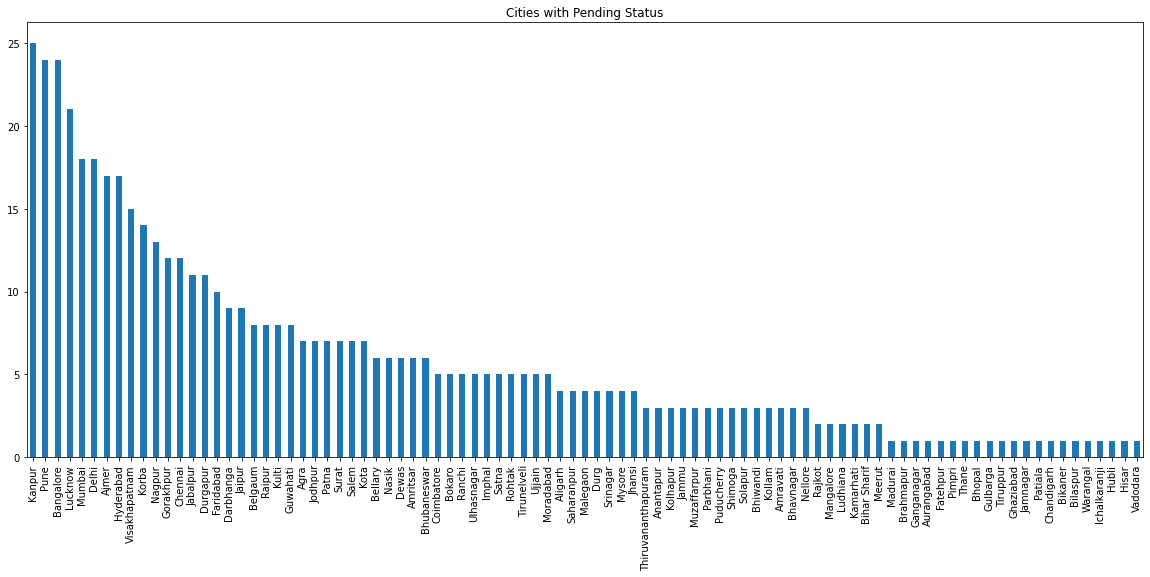

In [13]:
data1=data1['Order City'].value_counts().plot.bar(figsize=(20,8), title="Cities with Pending Status")

<strong>Which country has the most suspected fraud ?</strong>

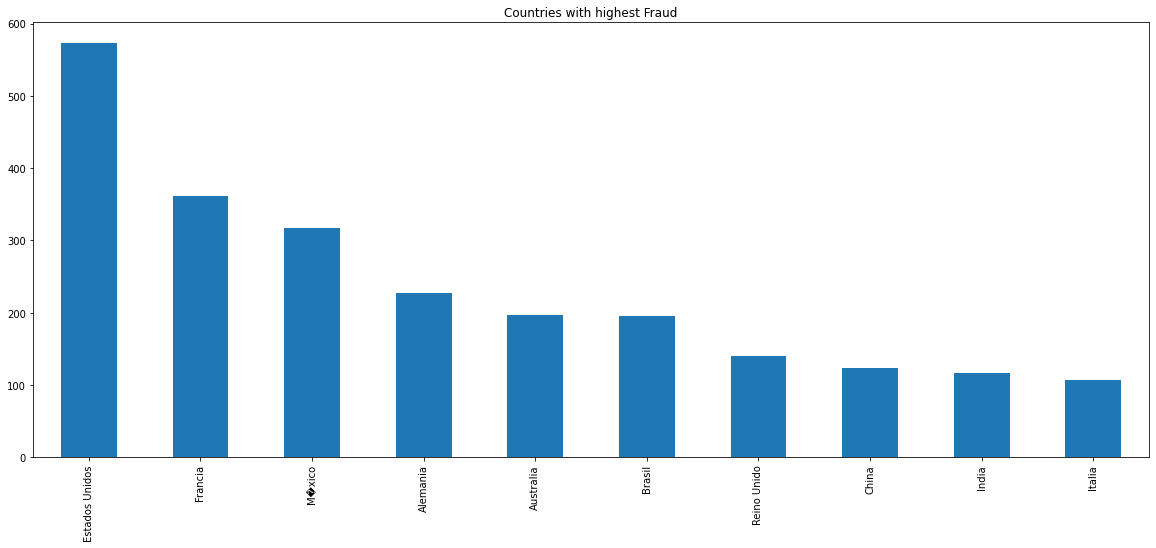

In [14]:
data2=df[df['Order Status']=='SUSPECTED_FRAUD']
data2=data2['Order Country'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Countries with highest Fraud")


<center><strong>The country with the highest fraund: Estados Unidos</strong></center> **

<strong>Which product(s) has/have the maximum discount ?</strong>

In [15]:
max_discount = df['Order Item Discount'].max()
data3=df[df['Order Item Discount']==max_discount]
data3[['Product Name','Order Item Discount']]

,Product Name,Order Item Discount
12606,SOLE E35 Elliptical,500.0


<center><strong>The product with the highest discount: SOLE E35 Elliptical</strong></center>

<strong>Which year had the minimum sales of the "Nike" Products ?</strong>

[Text(0.5, 1.0, 'Yearly Sales'), Text(0.5, 0, ''), Text(0, 0.5, 'Sales')]

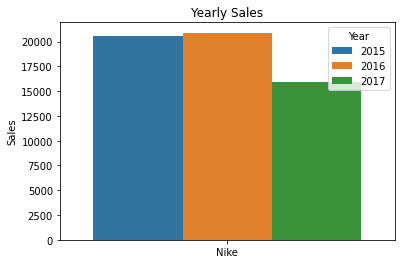

In [16]:
def fun(row):
    if(row.startswith('Nike')):
        return 'Nike'
    else:
        return row
df['Product Name'] =df['Product Name'].apply(fun)

df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')
df['Year'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
data5 = df[df['Product Name']=='Nike']
sns.countplot(x ='Product Name', data = data5,hue='Year').set(title='Yearly Sales', xlabel='', ylabel='Sales')

<center><strong>In the year 2017 minimum Nike Prodcts were sold</strong></center>

In [17]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

<strong>How may successfully processed orders have days for shipping real(Real)>Days for shipment(Scheduled) ?</strong>

In [18]:
data4=df[(df["Days for shipping (real)"] > df["Days for shipment (scheduled)"]) & (df['Order Status']=='COMPLETE')|(df['Order Status']=='CLOSED')]
data4.shape[0]

53815

<center><strong>The number of successfully processed Days for shipping(real) is greater than Days for shipment(scheduled)  is 103400</strong></center>